## Import modules

In [164]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

## Loading the dataset

In [165]:
df=pd.read_csv('bank-loan.csv')
df.head()

,age,ed,employ,address,income,debtinc,creddebt,othdebt,default
0,41,3,17,12,176,9.3,11.359392,5.008608,1.0
1,27,1,10,6,31,17.3,1.362202,4.000798,0.0
2,40,1,15,14,55,5.5,0.856075,2.168925,0.0
3,41,1,15,14,120,2.9,2.658720,0.821280,0.0
4,24,2,2,0,28,17.3,1.787436,3.056564,1.0


In [166]:
df.describe()

,age,ed,employ,address,income,debtinc,creddebt,othdebt,default
count,850.000000,850.000000,850.000000,850.000000,850.000000,850.000000,850.000000,850.000000,700.000000
mean,35.029412,1.710588,8.565882,8.371765,46.675294,10.171647,1.576805,3.078789,0.261429
std,8.041432,0.927784,6.777884,6.895016,38.543054,6.719441,2.125840,3.398803,0.439727
min,20.000000,1.000000,0.000000,0.000000,13.000000,0.100000,0.011696,0.045584,0.000000
25%,29.000000,1.000000,3.000000,3.000000,24.000000,5.100000,0.382176,1.045942,0.000000
50%,34.000000,1.000000,7.000000,7.000000,35.000000,8.700000,0.885091,2.003243,0.000000
75%,41.000000,2.000000,13.000000,12.000000,55.750000,13.800000,1.898440,3.903001,1.000000
max,56.000000,5.000000,33.000000,34.000000,446.000000,41.300000,20.561310,35.197500,1.000000


In [167]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 850 entries, 0 to 849
Data columns (total 9 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       850 non-null    int64  
 1   ed        850 non-null    int64  
 2   employ    850 non-null    int64  
 3   address   850 non-null    int64  
 4   income    850 non-null    int64  
 5   debtinc   850 non-null    float64
 6   creddebt  850 non-null    float64
 7   othdebt   850 non-null    float64
 8   default   700 non-null    float64
dtypes: float64(4), int64(5)
memory usage: 59.9 KB


## Preprocessing the dataset

In [168]:
df.isnull().sum()

age           0
ed            0
employ        0
address       0
income        0
debtinc       0
creddebt      0
othdebt       0
default     150
dtype: int64

In [169]:
# Droping missing value rows
df=df.dropna()
df.isnull().sum()

age         0
ed          0
employ      0
address     0
income      0
debtinc     0
creddebt    0
othdebt     0
default     0
dtype: int64

In [170]:
print(df.shape)

(700, 9)


## Exploratory Data Analysis

In [171]:
df.groupby('default').mean()

,age,ed,employ,address,income,debtinc,creddebt,othdebt
default,,,,,,,,
0.0,35.514507,1.659574,9.508704,8.945841,47.154739,8.679304,1.245493,2.773409
1.0,33.010929,1.901639,5.224044,6.393443,41.213115,14.727869,2.423865,3.862807


0.0    517
1.0    183
Name: default, dtype: int64


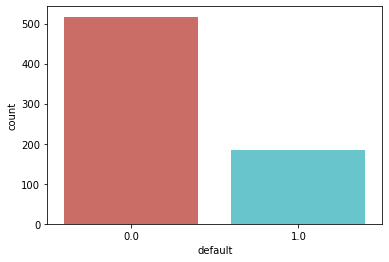

In [172]:
print(df['default'].value_counts())
sns.countplot(x='default',data=df, palette='hls')
plt.show()

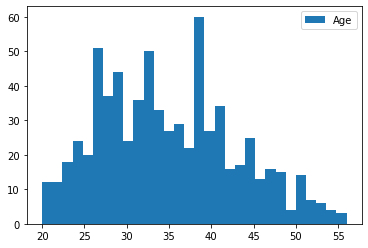

In [173]:
plt.hist(df.age,bins=30,label=['Age'])
plt.legend()

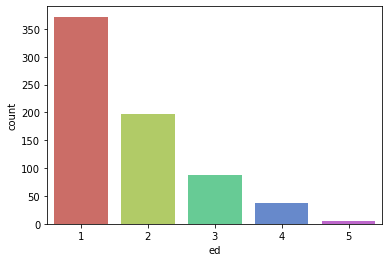

In [174]:
sns.countplot(x='ed',data=df, palette='hls')

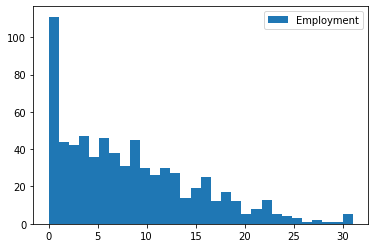

In [175]:
plt.hist(df.employ,bins=30,label=['Employment'])
plt.legend()

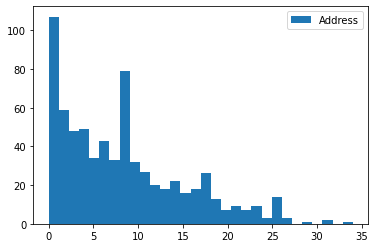

In [176]:
plt.hist(df.address,bins=30,label=['Address'])
plt.legend()

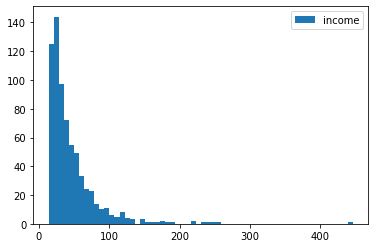

In [177]:
plt.hist(df.income,bins=60,label=['income'])
plt.legend()

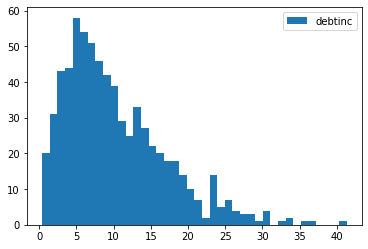

In [178]:
plt.hist(df.debtinc,bins=40,label=['debtinc'])
plt.legend()

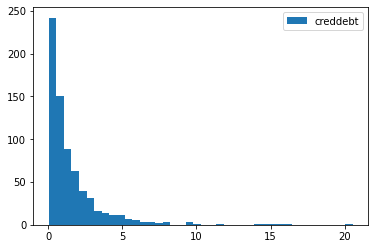

In [179]:
plt.hist(df.creddebt,bins=40,label=['creddebt'])
plt.legend()

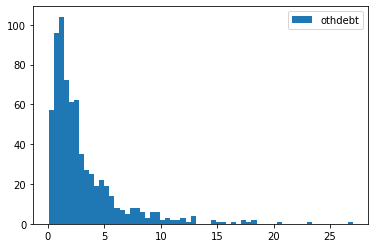

In [180]:
plt.hist(df.othdebt,bins=60,label=['othdebt'])
plt.legend()

## Outlier Detection

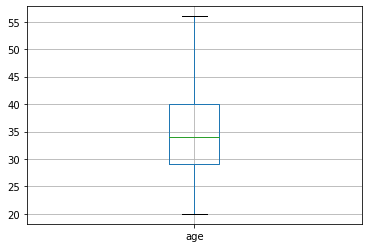

In [181]:
df.boxplot(column='age')

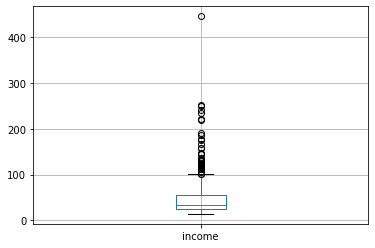

In [182]:
df.boxplot(column='income')

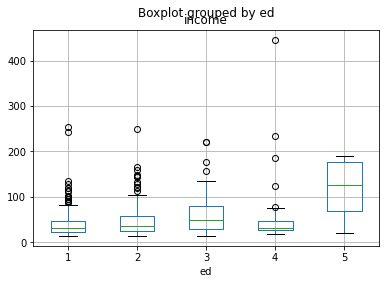

In [183]:
df.boxplot(column='income', by = 'ed')

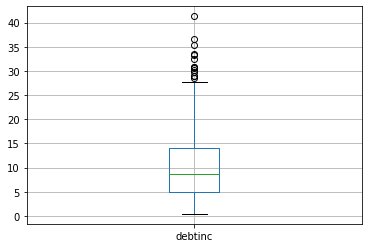

In [184]:
df.boxplot(column='debtinc')

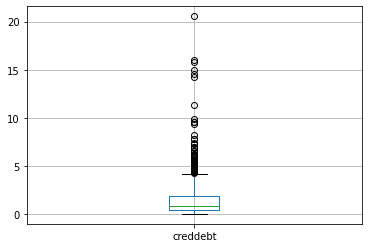

In [185]:
df.boxplot(column='creddebt')

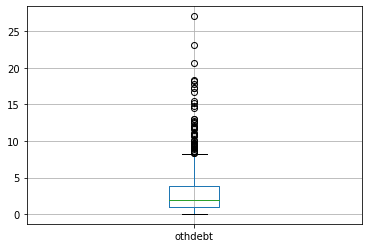

In [186]:
df.boxplot(column='othdebt')

## Log Transformation

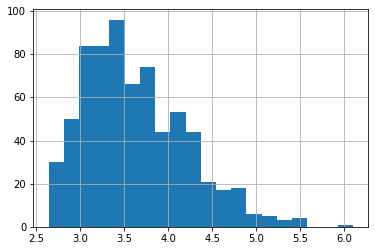

In [187]:
df['income'] = np.log(df['income'])
df['income'].hist(bins=20)

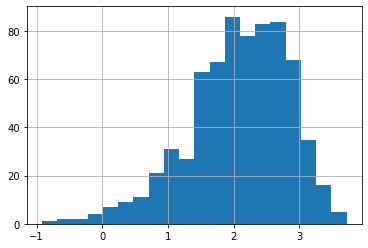

In [188]:
df['debtinc'] = np.log(df['debtinc'])
df['debtinc'].hist(bins=20)

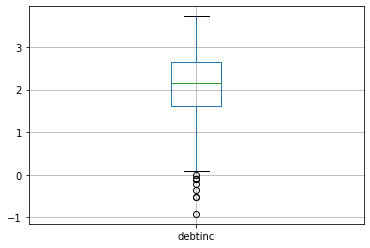

In [189]:
df.boxplot(column='debtinc')

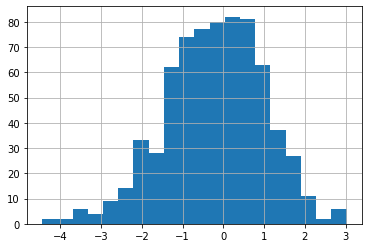

In [190]:
df['creddebt'] = np.log(df['creddebt'])
df['creddebt'].hist(bins=20)

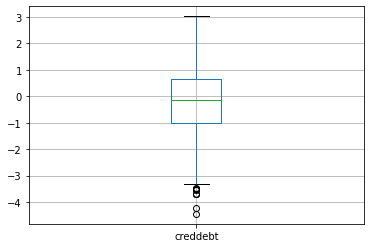

In [191]:
df.boxplot(column='creddebt')

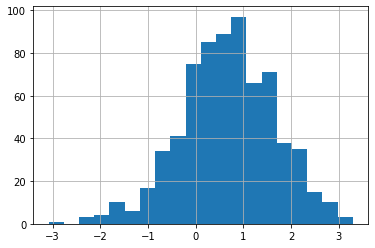

In [192]:
df['othdebt'] = np.log(df['othdebt'])
df['othdebt'].hist(bins=20)

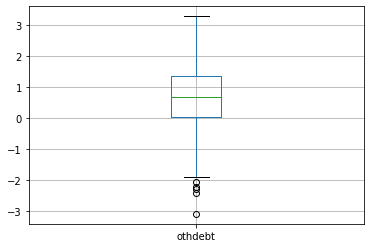

In [193]:
df.boxplot(column='othdebt')

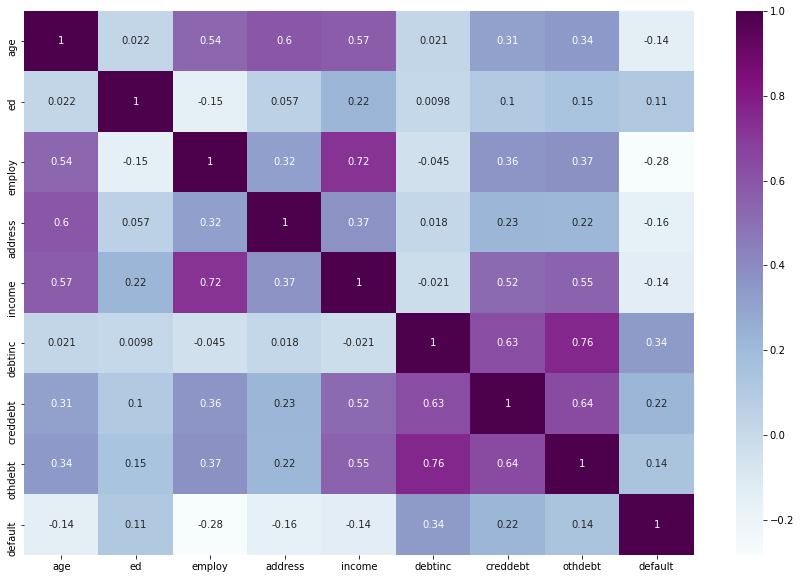

In [194]:
corr = df.corr()
plt.figure(figsize=(15,10))
sns.heatmap(corr, annot = True, cmap="BuPu")

## SMOTE

In [195]:
df['default'].value_counts()

0.0    517
1.0    183
Name: default, dtype: int64

In [196]:
df.dtypes

age           int64
ed            int64
employ        int64
address       int64
income      float64
debtinc     float64
creddebt    float64
othdebt     float64
default     float64
dtype: object

In [197]:
X=df[['age','ed', 'employ', 'address', 'income', 'debtinc', 'creddebt','othdebt']]
y=df['default']
print('shape of x: {}'.format(X.shape))
print('shape of y: {}'.format(y.shape))

shape of x: (700, 8)
shape of y: (700,)


In [198]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)

In [199]:
!pip install imblearn
from imblearn.over_sampling import SMOTE

In [200]:
print("Before OverSampling, counts of default '1': {}".format(sum(y_train == 1))) 
print("Before OverSampling, counts of default '0': {} \n".format(sum(y_train == 0))) 

from imblearn.over_sampling import SMOTE 
sm = SMOTE(random_state = 0) 
x_train_sm, y_train_sm = sm.fit_sample(x_train, y_train) 

print('After OverSampling, the shape of x_train: {}'.format(x_train_sm.shape)) 
print('After OverSampling, the shape of y_train: {} \n'.format(y_train_sm.shape)) 
  
print("After OverSampling, counts of label '1': {}".format(sum(y_train_sm == 1))) 
print("After OverSampling, counts of label '0': {}".format(sum(y_train_sm == 0)))

Before OverSampling, counts of default '1': 128
Before OverSampling, counts of default '0': 362 

After OverSampling, the shape of x_train: (724, 8)
After OverSampling, the shape of y_train: (724,) 

After OverSampling, counts of label '1': 362
After OverSampling, counts of label '0': 362


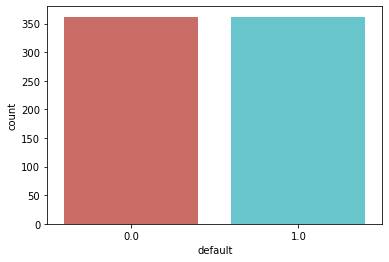

In [201]:
sns.countplot(y_train_sm,data=df, palette='hls')

## Model Selection

In [220]:
from sklearn.model_selection import cross_val_score
def classify(model, X, y):
    x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)
    sm = SMOTE(random_state = 0) 
    x_train_sm, y_train_sm = sm.fit_sample(x_train, y_train) 
    model.fit(x_train_sm, y_train_sm)
    print("Accuracy is", model.score(x_test, y_test)*100)
    # cross validation - it is used for better validation of model
    # eg: cv-5, train-4, test-1
    score = cross_val_score(model, X, y, cv=5)
    print("Cross validation is",np.mean(score)*100)
    
    print("Before OverSampling, counts of default '1': {}".format(sum(y_train == 1))) 
    print("Before OverSampling, counts of default '0': {} \n".format(sum(y_train == 0))) 
    
    print('After OverSampling, the shape of x_train: {}'.format(x_train_sm.shape)) 
    print('After OverSampling, the shape of y_train: {} \n'.format(y_train_sm.shape)) 
  
    print("After OverSampling, counts of label '1': {}".format(sum(y_train_sm == 1))) 
    print("After OverSampling, counts of label '0': {}".format(sum(y_train_sm == 0)))

In [221]:
from sklearn.linear_model import LogisticRegression
model = LogisticRegression(max_iter=1000)
classify(model, X, y)

Accuracy is 71.42857142857143
Cross validation is 81.14285714285714
Before OverSampling, counts of default '1': 128
Before OverSampling, counts of default '0': 362 

After OverSampling, the shape of x_train: (724, 8)
After OverSampling, the shape of y_train: (724,) 

After OverSampling, counts of label '1': 362
After OverSampling, counts of label '0': 362


In [222]:
from sklearn.tree import DecisionTreeClassifier
model = DecisionTreeClassifier()
classify(model, X, y)

Accuracy is 68.0952380952381
Cross validation is 69.28571428571428
Before OverSampling, counts of default '1': 128
Before OverSampling, counts of default '0': 362 

After OverSampling, the shape of x_train: (724, 8)
After OverSampling, the shape of y_train: (724,) 

After OverSampling, counts of label '1': 362
After OverSampling, counts of label '0': 362


In [223]:
from sklearn.ensemble import RandomForestClassifier,ExtraTreesClassifier
model = RandomForestClassifier()
classify(model, X, y)

Accuracy is 73.80952380952381
Cross validation is 78.85714285714285
Before OverSampling, counts of default '1': 128
Before OverSampling, counts of default '0': 362 

After OverSampling, the shape of x_train: (724, 8)
After OverSampling, the shape of y_train: (724,) 

After OverSampling, counts of label '1': 362
After OverSampling, counts of label '0': 362


In [218]:
model = ExtraTreesClassifier()
classify(model, X, y)

Accuracy is 71.9047619047619
Cross validation is 78.14285714285715


In [219]:
from sklearn.svm import SVC
model = SVC(gamma='auto')
classify(model, X, y)

Accuracy is 73.80952380952381
Cross validation is 75.85714285714286


In [231]:
from sklearn.model_selection import GridSearchCV
from sklearn import svm

model_params = {
    'svm': {
        'model': svm.SVC(gamma='auto'),
        'params' : {
            'C': [1,10,20],
            'kernel': ['rbf','linear']
        }  
    },
    'random_forest': {
        'model': RandomForestClassifier(),
        'params' : {
            'n_estimators': [1,5,10,100,120,150,200],
            'max_depth': [4, 7, 10, 20, 30],
            'min_samples_split': [2, 5, 10],
            'min_samples_leaf': [1, 2, 5]
        }
    },
    'logistic_regression' : {
        'model': LogisticRegression(max_iter=1000),
        'params': {
            'solver': ['newton-cg', 'lbfgs', 'liblinear', 'sag', 'saga'],
            'C': [1,5,10]
        }
    }
}

In [232]:
scores = []

for model_name, mp in model_params.items():
    clf =  GridSearchCV(mp['model'], mp['params'], cv=5, return_train_score=False)
    clf.fit(X,y)
    scores.append({
        'model': model_name,
        'best_score': clf.best_score_,
        'best_params': clf.best_params_
    })
    
grid = pd.DataFrame(scores,columns=['model','best_score','best_params'])
grid

,model,best_score,best_params
0,svm,0.810000,"{'C': 1, 'kernel': 'linear'}"
1,random_forest,0.808571,"{'max_depth': 10, 'min_samples_leaf': 5, 'min_..."
2,logistic_regression,0.812857,"{'C': 5, 'solver': 'liblinear'}"


In [226]:
model_name

'logistic_regression'

In [227]:
clf.score(x_test,y_test)

0.7

In [228]:
from sklearn.metrics import confusion_matrix
y_pred = clf.predict(x_test)
cm = confusion_matrix(y_test, y_pred)
cm

array([[111,  44],
       [ 19,  36]], dtype=int64)

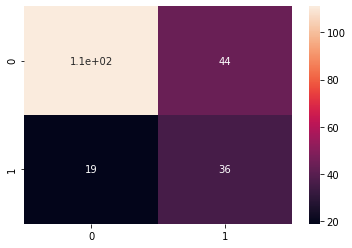

In [229]:
sns.heatmap(cm, annot=True)

In [230]:
from sklearn.metrics import classification_report
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

         0.0       0.85      0.72      0.78       155
         1.0       0.45      0.65      0.53        55

    accuracy                           0.70       210
   macro avg       0.65      0.69      0.66       210
weighted avg       0.75      0.70      0.71       210



In [163]:
model_name

'logistic_regression'